Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
#importing our libraries and reading our csv file
import numpy as np
import pandas as pd 
data=pd.read_csv("delivery_time.csv")

In [2]:
data.head()
data 

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [5]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
import warnings
warnings.filterwarnings('ignore')



In [7]:
new_data= pd.DataFrame(data)
new_data.set_axis(["del_time","sort_time"], axis="columns", inplace=True)
new_data

,del_time,sort_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
type(new_data)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='del_time', ylabel='Density'>

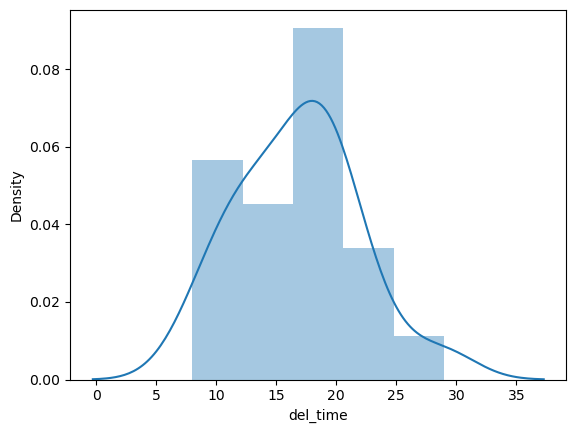

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.distplot(new_data["del_time"])

<AxesSubplot:xlabel='sort_time', ylabel='Density'>

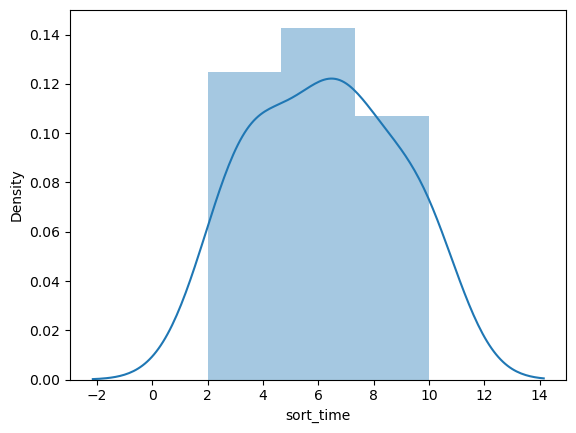

In [10]:
sns.distplot(new_data["sort_time"])

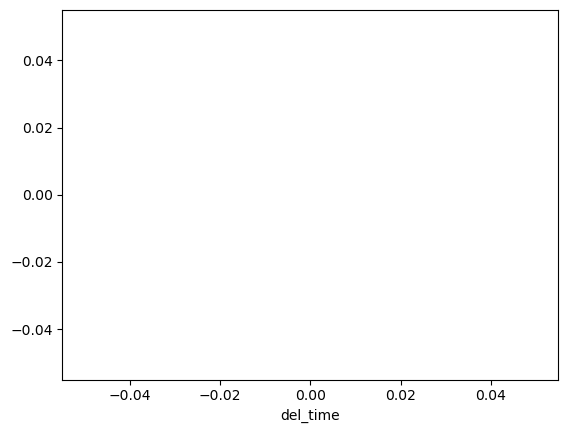

In [11]:
sns.scatterplot(new_data.del_time)
plt.show()

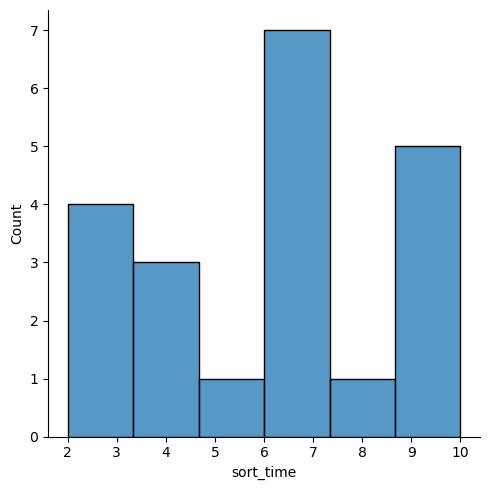

In [12]:
import seaborn as sns
sns.displot(new_data["sort_time"])


fitting a Linear_Regression model 

In [13]:
import statsmodels.formula.api as smf
model=smf.ols("del_time~ sort_time", data=new_data).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               del_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        16:32:56   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sort_time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [16]:
pred=model.predict(new_data.sort_time)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [17]:
model.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [18]:
rmse_lin = np.sqrt(np.mean((np.array(new_data['del_time'])-np.array(pred))**2))
rmse_lin  

2.7916503270617654

Text(0, 0.5, 'delivery_time')

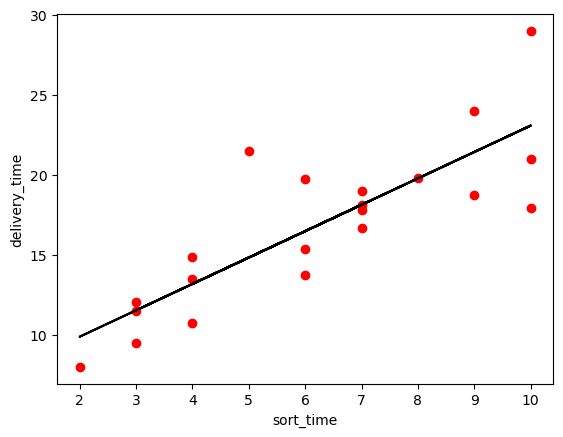

In [19]:
#import matplotlib.pylab as plt
plt.scatter(x=new_data['sort_time'],y=new_data['del_time'],color='red')
plt.plot(new_data['sort_time'],pred,color='black')
plt.xlabel('sort_time')
plt.ylabel('delivery_time') 

In [20]:
model2 = smf.ols('del_time~np.log(sort_time)',data=new_data).fit()

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               del_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        16:32:56   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sort_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
pred2 = model2.predict(pd.DataFrame(new_data['sort_time'])) 
pred2  

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [23]:
pred2
rmse_log = np.sqrt(np.mean((np.array(new_data['del_time'])-np.array(pred2))**2))
rmse_log 

2.733171476682066

In [24]:
pred2.corr(new_data.sort_time)

0.9774469985241836

Text(0, 0.5, 'delivery_time')

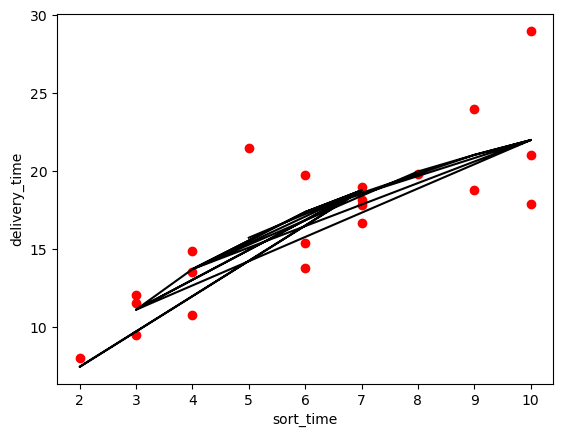

In [25]:
plt.scatter(x=new_data['sort_time'],y=new_data['del_time'],color='red')
plt.plot(new_data['sort_time'],pred2,color='black')
plt.xlabel('sort_time')
plt.ylabel('delivery_time') 

In [26]:
#exponential model
model3 = smf.ols('np.log(del_time)~sort_time',data=new_data).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(del_time)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                        16:32:56   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
sort_time      0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
pred_log = model3.predict(pd.DataFrame(new_data['sort_time']))

In [28]:
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [29]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [30]:
rmse_exp = np.sqrt(np.mean((np.array(new_data['del_time'])-np.array(pred3))**2)) 
rmse_exp 

2.940250323056201

In [31]:
pred3.corr(new_data.del_time)

0.808578010828926

Text(0, 0.5, 'delivery_time')

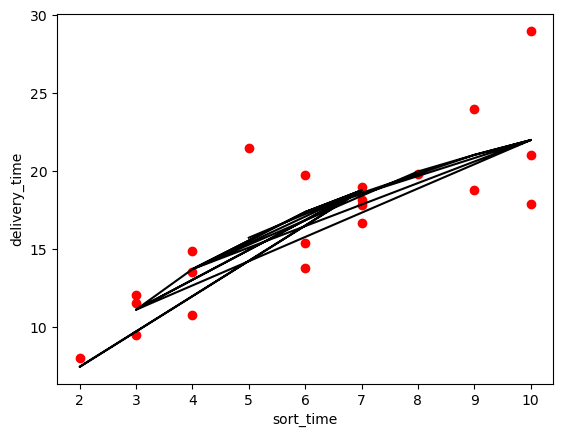

In [32]:
plt.scatter(x=new_data['sort_time'],y=new_data['del_time'],color='red')
plt.plot(new_data['sort_time'],pred2,color='black')
plt.xlabel('sort_time')
plt.ylabel('delivery_time') 

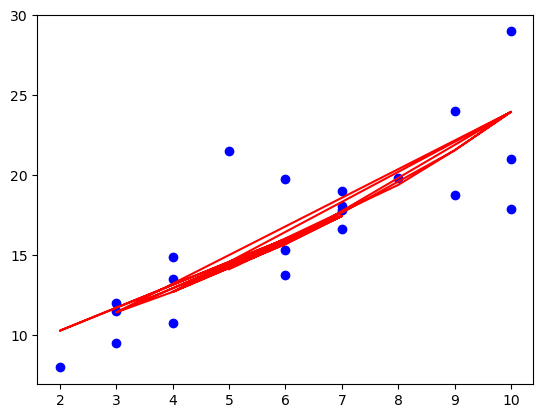

In [33]:
plt.plot(new_data['sort_time'],new_data['del_time'], 'bo')  
plt.plot(new_data.sort_time,pred3,color='red')

In [34]:
new_resid=model3.resid_pearson

In [35]:
new_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

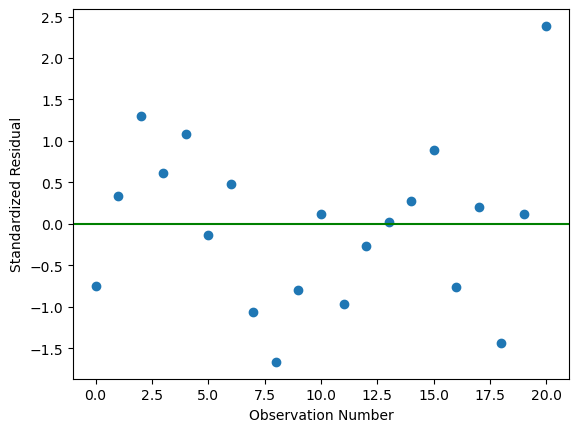

In [36]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [37]:
new_data["new_data_Sq"] = new_data.sort_time*new_data.sort_time
new_data

,del_time,sort_time,new_data_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [38]:
model_quad = smf.ols("np.log(del_time)~sort_time+new_data_Sq",data=new_data).fit()
#model_quad.params 

In [39]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(del_time)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           2.20e-06
Time:                        16:32:56   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6997      0.228      7.441      0.000       1.220       2.180
sort_time       0.2659      0.080      3.315      0.004       0.097       0.434
new_data_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
pred_quad = model_quad.predict(new_data)
pred4=np.exp(pred_quad)  # as we have used log(del_time) in preparing model so we need to convert it back
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [41]:
rmse_quad = np.sqrt(np.mean((np.array(new_data['del_time'])-np.array(pred4))**2))
rmse_quad 

2.799041988740925

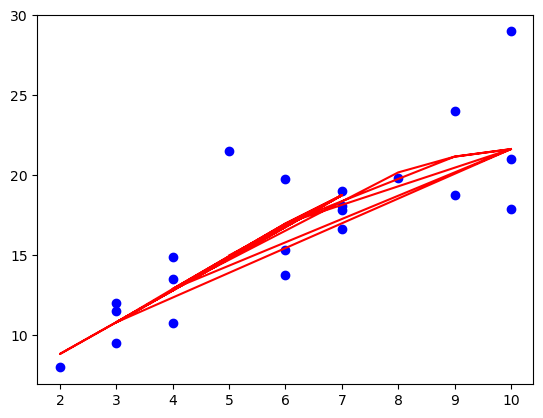

In [42]:
plt.scatter(new_data.sort_time,new_data.del_time,c="b")
plt.plot(new_data.sort_time,pred4,"r") 

Text(0, 0.5, 'Standardized Residual')

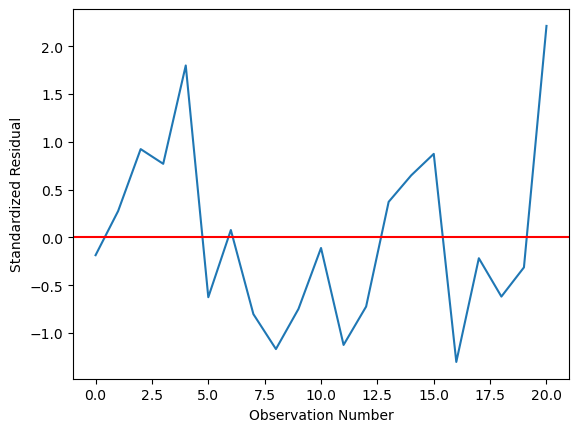

In [43]:
plt.plot(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 

Text(0, 0.5, 'Standardized Residual')

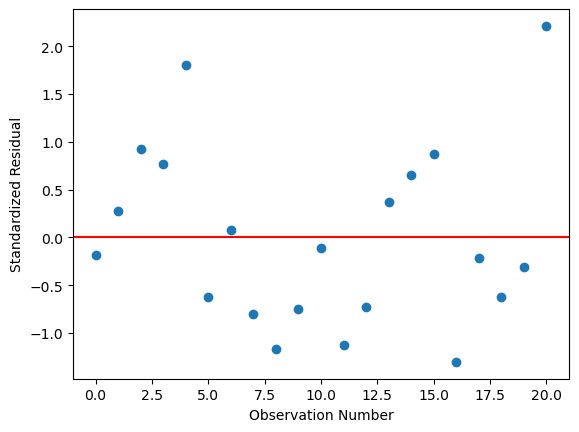

In [44]:
plt.scatter(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

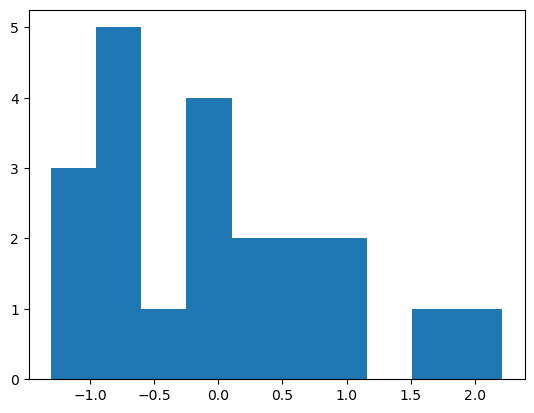

In [45]:
plt.hist(model_quad.resid_pearson)
plt.show() 

In [46]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867


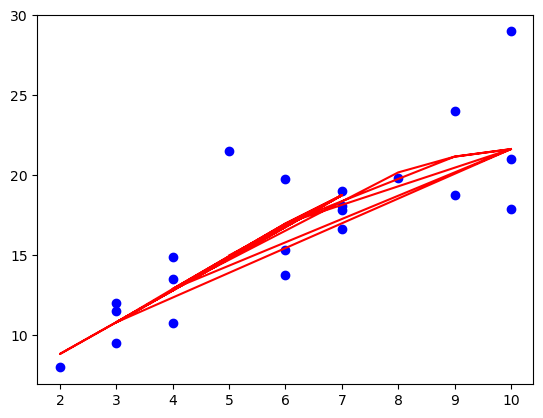

In [47]:
plt.scatter(new_data.sort_time,new_data.del_time,c="b")
plt.plot(new_data.sort_time,pred4,"r")